## Python Imports

In [1]:
# import statements 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

## Import the Sambanis dataset

In [2]:
# 88 variables specified in Sambanis 2006, found in R code
cols_sambanis = ["warstds", "ager", "agexp", "anoc", "army85", "autch98", "auto4",
        "autonomy", "avgnabo", "centpol3", "cowcode", "coldwar", "decade1", "decade2",
        "decade3", "decade4", "dem", "dem4", "demch98", "dlang", "drel",
        "durable", "ef", "ef2", "ehet", "elfo", "elfo2", "etdo4590",
        "expgdp", "exrec", "fedpol3", "fuelexp", "gdpgrowth", "geo1", "geo2",
        "geo34", "geo57", "geo69", "geo8", "illiteracy", "incumb", "infant",
        "inst", "inst3", "life", "lmtnest", "ln_gdpen", "lpopns", "major", "manuexp", "milper",
        "mirps0", "mirps1", "mirps2", "mirps3", "nat_war", "ncontig",
        "nmgdp", "nmdp4_alt", "numlang", "nwstate", "oil", "p4mchg",
        "parcomp", "parreg", "part", "partfree", "plural", "plurrel",
        "pol4", "pol4m", "pol4sq", "polch98", "polcomp", "popdense",
        "presi", "pri", "proxregc", "ptime", "reg", "regd4_alt", "relfrac", "seceduc",
        "second", "semipol3", "sip2", "sxpnew", "sxpsq", "tnatwar", "trade",
        "warhist", "xconst", "year"]

sambanis = pd.read_csv("SambnisImp.csv", usecols=cols_sambanis)

### Print informations
print(f'Sambanis dataset has {sambanis.shape[0]} rows with {sambanis.shape[1]} features.')
#civil_war contains only the observations with a civil war
civil_war = sambanis[sambanis["warstds"]==1]
print(f'There are {civil_war.shape[0]} civil war in the dataset.')
nb_country_cw = len(civil_war['cowcode'].value_counts())
print(f'There are {nb_country_cw} different country which had a CW (some countries had multiple CW)')
print(f'The data ranges from 1945 to 2000. The first CW dates form {min(civil_war.year)} and the last {max(civil_war.year)}')

Sambanis dataset has 7140 rows with 93 features.
There are 116 civil war in the dataset.
There are 72 different country which had a CW (some countries had multiple CW)
The data ranges from 1945 to 2000. The first CW dates form 1946 and the last 1999


## Import the Geographic Neighbours dataset

In [3]:
#load the border dataset
geodata = pd.read_csv("geodata.csv")

## Import the TIV Tables (weapons import and export)

In [4]:
df_tiv_import = pd.read_csv("TIV-Import-All-1950-2019.csv")
df_tiv_export = pd.read_csv("TIV-Export-All-1950-2019.csv")
df_tiv_import.drop(columns=["Total"], inplace=True)
df_tiv_export.drop(columns=["Total"], inplace=True)

## Import the Military expenses dataset

In [5]:
# Expenses as share of the GDP
df_milexp_gdp = pd.read_csv("SIPRI_Milex_shareGDP_1949_2019.csv",
                            skiprows=5,
                            sep="\t")
#remove the footer
df_milexp_gdp.drop(index=df_milexp_gdp.index[-8:], inplace=True)

#replace the xxx (country did not exist at this time) and .. (data unavailable)
df_milexp_gdp.replace(["xxx",". ."], np.NaN, inplace=True)

#remove the % sign and convert to float
year_cols = df_milexp_gdp.columns[2:]
for i in year_cols:
    df_milexp_gdp[i] = df_milexp_gdp[i].str.rstrip('%').astype('float')

#lowercase the "Country" column
df_milexp_gdp.rename(columns={"Country":"country"}, inplace=True)

# Expenses as share of Governement spendings
df_milexp_spe = pd.read_csv("SIPRI_Milex_shareGovtspend_1949_2019.csv",
                            skiprows=7,
                            sep="\t")

#remove the footer
df_milexp_spe.drop(index=df_milexp_spe.index[-7:], inplace=True)

#replace the xxx (country did not exist at this time) and .. (data unavailable)
df_milexp_spe.replace(["xxx",". .", '#VALUE!'], np.NaN, inplace=True)

#remove the % sign and convert to float
year_cols = df_milexp_spe.columns[3:]
for i in year_cols:
    df_milexp_spe[i] = df_milexp_spe[i].str.rstrip('%').astype('float')

#lowercase the "Country" column
df_milexp_spe.rename(columns={"Country":"country"}, inplace=True)

## Import the Systemic Peace dataset

In [6]:
df_sys_peace = pd.read_csv("sys_peace.csv", sep=';')
df_sys_peace["Begin"] = pd.to_numeric(df_sys_peace["Begin"])
mask = df_sys_peace["End"] == "*"
df_sys_peace.loc[mask,'End'] = df_sys_peace.loc[mask,'Begin']
df_sys_peace['End'] = df_sys_peace['End'].str[:4]
df_sys_peace["End"] = pd.to_numeric(df_sys_peace["End"], downcast='integer')
df_sys_peace = df_sys_peace.loc[df_sys_peace.Begin<2001]
df_sys_peace = df_sys_peace.loc[df_sys_peace.End<2001]
df_sys_peace["End"] = pd.to_numeric(df_sys_peace["End"], downcast='integer')

#some cleaning
for artef in ["2","3","4","5","'"," "]:
    df_sys_peace["States Directly Involved"] = df_sys_peace["States Directly Involved"].str.replace(artef, '')

## Conversion dictionnaries

In [7]:
#convert the variable to their simplied labels
var2label_s = dict({
    "sxpsq":"Primary Commodity Exports (Squared)",
    "sxpnew":"Primary Commodity Exports",
    "agexp":"Agricultural Raw Materials Exports",
    "illiteracy":"Illiteracy Rate",
    "manuexp":"Manufactures Exports",
    "milper":"Military Power",
    "fuelexp":"Fuel and Oil Exports",
    "gdpgrowth":"GDP Growth",
    "lpopns": "Population (logged)",
    "trade":"Trade as Percent of GDP",
    "expgdp":"Goods & Services Exports",
    "nmgdp":"Neighbors' average GDP per capita)",
    "popdense":"Population Density",
    "ln_gdpen":"GDP per Capita (logged)",
    "ptime":"ptime = ???",
    "avgnabo":"Average SUP score of neighbors",
    "pri":"Primary Education",
    "ager":"Goverment age",
    "infant":"Infant mortality",
    "durable":"Year since last regime transition",
    "life":"Life Expectancy",
    "seceduc":"Secondary Education",
    "dlang":"Linguistic Hetrogeneity",
    "partfree":"Anocracy",
    "part":"ln(Share of population voting x opposition's share \
of votes cast)",
    "p4mchg":"Annual change in modified polity, Polity IV",
    "demch98":"Democracy annual change; Polity 98",
    "dem":"Democracy",
    "incumb":"Consolidation of incumbent advantages (Przeworksi \
et al., 2000)",
    "army85":"Military Power",
    "major":"Majoritatian system",
    "semipol3": "Semi-federal state, Polity III",
    "oil":"Oil Exports per GDP",
    "lmtnest":"Rough Terrain",
    "autonomy":"Country has de facto autonomous regions",
    "sip2":"Continuous measure of democracy",
    "ehet":"Ethnic Heterogeneity",
    "ef":"Ethnic Fractionalization",
    "regd4_alt":"Median Regional Polity Score",
    "pol4sq":"Polity Index squarred",
    "presi":"Presidential system",
    "proxregc":"Regime Transition Score",
    "inst3":"Political Instability",
    "xconst":"Executive constraints - operational independence of CE",  
})

# update the conversion dictionnary to facilitate the merge between sambanis and geodata
dic_country_conv = dict({
    "Bolivia (Plurinational State Of)":"Bolivia",
    'Cabo Verde':'Cape Verde',
    'Czechia':'Czech Republic',
    'Congo (the Democratic Republic of the)':'Democratic Republic of the Congo',
    'Gambia (the)':'Gambia',
    'Iran (Islamic Republic of)':'Iran',
    'Cote d’Ivoire':'Ivory Coast',
    "Lao People's Democratic Republic":'Laos',
    "Moldova (the Republic of)":'Moldova',
    'Viet Nam':'Republic of Vietnam',
    'Russian Federation':'Russia',
    'Korea (the Republic of)':'South Korea',
    'Eswatini':'Swaziland',
    'Syrian Arab Republic':'Syria',
    'Taiwan (Province of China)':'Taiwan',
    'Tanzania (the United Republic of)':'Tanzania',
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    "Yemen People's Republic":'Yemen',
    'Yemen Arab Republic':'Yemen'
})

# update the conversion dictionnary to facilitate the merge between sambanis and import tiv tables
dic_country_conv.update({
    'Bosnia-Herzegovina':'Bosnia and Herzegovina',
    'Cabo Verde':'Cape Verde',
    'Viet Nam':'Republic of Vietnam',
    'UAE':'United Arab Emirates',
    'United States':'United States of America',
    'South Yemen':"Yemen People's Republic",
    'North Yemen':'Yemen Arab Republic',
    'DR Congo':'Democratic Republic of the Congo',
    "Cote d'Ivoire":'Ivory Coast'
})

# update the conversion dictionnary to facilitate the merge between sambanis and export tiv tables
dic_country_conv.update({
    'USA':'United States of America',
    'Congo, Dem. Rep.':'Democratic Republic of the Congo',
    'UK':'United Kingdom',
    'Côte d’Ivoire':'Ivory Coast',
    'Yemen, North':'Yemen Arab Republic',
    'Central African Rep.':'Central African Republic',
    'Congo, Repubic of':'Congo',
    'Congo, Republic of':'Congo',
    'Dominican Rep.':'Dominican Republic',
    'Korea, South':'South Korea',
    'Trinidad & Tobago':'Trinidad and Tobago'
})

# update the conversion dictionnary to facilitate the merge between sambanis and systemic peace dataset
dic_country_conv.update({
 'Bosnia':'Bosnia and Herzegovina',
 'Congo-Brazzaville':'Congo',
 'ElSalvador':'El Salvador',
 'Equatorial Guinea':'Guinea',
 'Mauritania(1979)':'Mauritania',
 'Myanmar(Burma)':'Myanmar',
 'NorthKorea':'North Korea',
 'NorthVietnam':'North Vietnam',
 'PapuaNewGuinea':'Papua New Guinea',
 'SouthAfrica':'South Africa',
 'SouthKorea':'South Korea',
 'SouthVietnam':'South Vietnam',
 'SriLanka':'Sri Lanka',
 'UK':'United Kingdom',
 'USA':'United States of America',
 'Vietnam':'Republic of Vietnam',
 'YemenAR':'Yemen Arab Republic',
 'YemenPDR':"Yemen People's Republic"
})

## Convert the Sambanis dataset COWCODE to countries' name and abbreviation

In [8]:
#loading the cowcode dataset
cowcodes = pd.read_csv("COW_country_codes.csv")
cowcodes = cowcodes.rename(columns={'CCode': 'cowcode', 'StateNme':'country'})

#create the dictionaries
dict_cowcode = dict(zip(cowcodes.cowcode,cowcodes.country))
dict_cowcode_abb = dict(zip(cowcodes.cowcode,cowcodes.StateAbb))

### MANUAL UPDATE BASED ON INCONSISTENCIES
dict_cowcode.update({
89: "United Province CA",
99: "Gran Colombia",
324: "Sardinia",
342: "Serbia",
347: "Yugoslavia/Serbia and Montenegro",
348: "Montenegro",
364: "USSR",
525: "South Sudan",
529: "Ethiopia",
626: "Sudan-North",
769: "Pakistan",
818: "Republic of Vietnam"
})

dict_cowcode_abb.update({
89: "United Province CA",
99: "Gran Colombia",
324: "Sardinia",
342: "Serbia",
347: "Yugoslavia/Serbia and Montenegro",
348: "Montenegro",
364: "USSR",
525: "South Sudan",
529: "Ethiopia",
626: "Sudan-North",
769: "Pakistan",
818: "VNM"
})

#manual update to facilitate the plotting
dict_cowcode_abb[817] = "VNM"

sambanis['country'] = sambanis.cowcode.map(dict_cowcode)
sambanis['country_abb'] =sambanis.cowcode.map(dict_cowcode_abb) 

## Convert the Geodata dataset countrie's name (uniformisation based on Sambanis)

In [9]:
#update the name of the countries in the geodata to allow a merge
geodata["country_name"].replace(to_replace=dic_country_conv, inplace=True)
geodata["country_border_name"].replace(to_replace=dic_country_conv, inplace=True)

## Convert the TIV tables dataset countrie's name (uniformisation based on Sambanis)

In [10]:
#update the TIV import
df_tiv_import["country"].replace(to_replace=dic_country_conv, inplace=True)
#update the TIV export
df_tiv_export["country"].replace(to_replace=dic_country_conv, inplace=True)

## Convert the Military expenditure dataset countries' name (uniformisation based on Sambanis)

In [11]:
#convert the countries' name (to sambanis convention)
df_milexp_gdp["country"].replace(to_replace=dic_country_conv, inplace=True)

#convert the countries' name (to sambanis convention)
df_milexp_spe["country"].replace(to_replace=dic_country_conv, inplace=True)

## Convert the Systemic Peace dataset countries' name and expand the dataset to have a row for each country participating in the same war

In [12]:
sys_p_clean = pd.DataFrame()
for idx, war in df_sys_peace.iterrows():
    parties = war["States Directly Involved"].split(',')
    if len(parties) > 1:
        for par in parties:
            tmp = war.copy()
            if par in dic_country_conv:
                tmp["States Directly Involved"] = dic_country_conv[par]
            else:
                tmp["States Directly Involved"] = par
                
            sys_p_clean = pd.concat([sys_p_clean, tmp], axis=1)
    else:
        if parties[0] in dic_country_conv:
                war["States Directly Involved"] = dic_country_conv[parties[0]]
        sys_p_clean = pd.concat([sys_p_clean, war], axis=1)

sys_p_clean = sys_p_clean.T

## Merge the TIV tables with the Sambanis dataset

In [13]:
# melt the TIV df to enable merging on country and year columns
tiv_imp_m = pd.melt(df_tiv_import,
                    id_vars="country",
                    var_name="year",
                    value_name="tiv_imp")
tiv_exp_m = pd.melt(df_tiv_export,
                    id_vars="country",
                    var_name="year",
                    value_name="tiv_exp")

#convert year column to datetime
tiv_exp_m["year"] = tiv_exp_m["year"].apply(int)
tiv_imp_m["year"] = tiv_imp_m["year"].apply(int)

#merge on country and yeat, for TIV import and export
sambanis = sambanis.merge(tiv_imp_m,
                          on=["country", "year"],
                          how="left")
sambanis = sambanis.merge(tiv_exp_m,
                          on=["country", "year"],
                          how="left")

## Merge the military expenses with the Sambanis dataset

In [14]:
# melt the TIV df to enable merging on country and year columns
milexp_gdp_m = pd.melt(df_milexp_gdp.drop(columns=["Notes"]),
                    id_vars="country",
                    var_name="year",
                    value_name="milexp_gdp")
milexp_spe_m = pd.melt(df_milexp_spe.drop(columns=["Notes", "Reporting year"]),
                    id_vars="country",
                    var_name="year",
                    value_name="milexp_spe")

#convert year column to datetime
milexp_gdp_m["year"] = milexp_gdp_m["year"].apply(int)
milexp_spe_m["year"] = milexp_spe_m["year"].apply(int)

#merge on country and yeat, for TIV import and export
sambanis = sambanis.merge(milexp_gdp_m,
                          on=["country", "year"],
                          how="left")
sambanis = sambanis.merge(milexp_spe_m,
                          on=["country", "year"],
                          how="left")

## Define a subset of the important features based on the replication work (random forest, importance of the features)

In [15]:
#"high importance features" ~ (cf Random Forest)
feat_subset = [ "sxpnew",
                "illiteracy",
                "milper",
                "gdpgrowth",
                "lpopns",
                "pri",
                "infant",
                "life",
                "seceduc"
              ]

#list of countries affected by at least 1 CW
CW_countries = list(sambanis.loc[sambanis["warstds"]==1]["country"].drop_duplicates())

In [16]:
#small multiples + export to plot the features accross all the countries
"""
#iterate on the "high priority features"
for key in feat_subset:
    #create enough column and row for 
    fig, ax = plt.subplots(nrows=9, ncols=9, figsize=(50,50))
    j=0
    #iterate on the countries affected by civil war
    for i, country in enumerate(CW_countries):
        if i%9 == 0 and i != 0:
            j+=1
        plot_feat(sambanis, country, key, ax=ax[j,i%9], title=country)
    
    #save plot as pdf to enable lossless zooming using pdf viewer
    fig.savefig(fname="fig_"+var2label_s[key]+".pdf", format="pdf")
"""
print("used during the data exploration")

used during the data exploration


### Small multiple analysis
- GDP Growth : for several countries, the onset of CW is followed by a brutal drop (expected based on the replication work with Random Forest), it sometimes even becomes negative.
- Illiteracy (adult): hard to tell, it seems to decrease with time overall, did not notice brutal spike (somehow logic; people don't forget how to read because of civil war. maybe try to detect delayed effect?)
- Infant Mortality : definitely something, the onset are often associated with a big jump (ponctual)
- Life Expectancy : super obvious, on CW onset year, the value is usually much lower
- Military power : interesting as well, some "jump to a new plateau" can be observed (Vietnam for exemple) or just ponctual spike.
- Population (logged) : Nothing visible except for Laos
- Primary Commodity Export : sudden drop visible for african countries (Sierra Leone, Somalia, South Africa, Uganda, ..). Not visible for every single onset.
- Primary Education : ponctual drop on onset year
- Secondary Education : same as Primary. (Cuba seems interesting)

## Helper functions

In [17]:
#return a view on neighbouring countries sambanis dataframe corresponding rows
"""def return_neighbour_feat(df, country, geodata=geodata):
    tmp = list(geodata.loc[geodata["country_name"] == country]["country_border_name"])
    neigh_df = df.loc[df["country"].isin(tmp)]
    return neigh_df"""

def comp_neighbour(df, country, geodata=geodata):
    tmp = list(geodata.loc[geodata["country_name"] == country]["country_border_name"])
    neigh_df = df.loc[df["country"].isin(tmp)]
    return neigh_df

#quick plot of a feature with a vertical red line for the onset
def plot_feat(df, country, feat, var2label=var2label_s,
              ax=None, title=None):
    tmp=df.loc[df["country"]==country]
    if ax != None:
        ax.scatter(tmp.year, tmp[feat])
        for onset in tmp.loc[tmp["warstds"] == 1]["year"]:
            ax.axvline(x=onset, c='r')
        ax.set_title(title)
    else:
        plt.scatter(tmp.year, tmp[feat])
        for onset in tmp.loc[tmp["warstds"] == 1]["year"]:
            plt.axvline(x=onset, c='r')
        plt.title(var2label[feat])
        plt.show()

#plot the evolution of the feature in a time window around the onset
def display_onset_effect(df, country, onset_date, feat, t_win=3, ylim=[]):
    start = onset_date - t_win
    end = onset_date + t_win
    tmp = df.loc[(df["country"] == country) & (df["year"] <= end) & (df["year"] >= start)]
    sns.scatterplot(data=tmp,x="year",y=feat)
    plt.title(country)
    plt.axvline(x=onset_date, c='r', ls="--")
    
    if len(ylim) != 0:
        plt.ylim(ylim)

#return a binary value depending on the variation of the feature before/after the onset
def bin_onset_effect(df, country, onset_date, feat, t_win=3, threshold=0.1, inc=True, verbose=False):
    """ compute the average over a year window for the given feature
        return (1,1) if data was available and increase/decrease greater than the threshold
        return (0,1) if data was available but variation smaller than threshold
        return (0,0) if data is missing (year not present in the dataset)
    """
    start = onset_date - t_win
    end = onset_date + t_win
    tmp = df.loc[(df["country"] == country) & (df["year"] <= end) & (df["year"] >= start)]
    
    if(len(tmp.loc[tmp["year"]<onset_date]) < t_win) or \
        (len(tmp.loc[tmp["year"]>=onset_date]) < t_win) or \
        (tmp.loc[tmp["year"]<onset_date][feat].isnull().sum() > 1) or \
        (tmp.loc[tmp["year"]>=onset_date][feat].isnull().sum() > 1):
        return 0, 0
    
    before_mean = np.nanmean(tmp.loc[tmp["year"]<onset_date][feat])
    after_mean = np.nanmean(tmp.loc[tmp["year"]>=onset_date][feat])
    variation = (after_mean-before_mean)/before_mean
    
    if(verbose):
        print("before", before_mean)
        print("after", after_mean)
        print(variation)
    
    #increase greater than threshold
    if inc and variation >= threshold:
        return 1, 1
    #decrease greater than threshold
    elif not inc and variation < 0 and np.abs(variation) > threshold :
        return 1, 1
    else:
        return 0, 1

#compute the average over a window for all the countries neighbours to a onset
def comp_neighbour_feat(df, country, onset_date, t_win=3, geodata=geodata):
    #get the neighbours
    tmp = list(geodata.loc[geodata["country_name"] == country]["country_border_name"])
    neigh_df = df.loc[df["country"].isin(tmp)]
    
    #restrict the years
    start = onset_date - t_win
    end = onset_date + t_win
    neigh_df = neigh_df.loc[(df["year"] <= end) & (df["year"] >= start)]
    
    neigh_df.drop(columns=['cowcode', 'ptime',
                           'autch98', 'demch98','polch98', 'country_abb',
                           'decade1', 'decade2', 'decade3', 'decade4'],
                  inplace=True)
    
    cols = list(neigh_df.columns[1:])
    cols = cols[0:-5]+cols[-4:]
    
    #convert to numeric
    neigh_df[cols[1:]] = neigh_df[cols[1:]].apply(pd.to_numeric, errors='coerce', axis=1)
    
    df_pre = pd.DataFrame()
    df_pos = pd.DataFrame()
    
    #compute the mean of each feature before/after for each feature
    for idx, group in neigh_df.groupby("country"):
        df_pre = pd.concat([df_pre,
                            group.loc[group['year'] < onset_date][cols].apply(np.nanmean, axis=0).rename(idx)],
                            axis=1)
        df_pos = pd.concat([df_pos,
                            group.loc[group['year'] >= onset_date][cols].apply(np.nanmean, axis=0).rename(idx)],
                            axis=1)
    df_pre = df_pre.T
    df_pos = df_pos.T

    if len(df_pre) == 0 or len(df_pos) == 0:
        return pd.DataFrame(), pd.DataFrame()
    else:
        #remove countries experiencing an onset themself within the timeframe
        df_pre = df_pre.loc[df_pre['warstds']!=1]
        df_pos = df_pos.loc[df_pos['warstds']!=1]
        return df_pre, df_pos
    
def get_n_plicate(dataframe, column,n=1):
    """ return a dataframe containing the n-plicate according to a column
        if n is greater than 1,  x-plicates are present in the dataframe with x<n,
        raise a ValueError
    """
    if (len(dataframe)-len(dataframe.drop_duplicates(subset=column)))!=0:
        #"_" is a placeholder
        return pd.concat(g for _, g in dataframe.groupby(column) if len(g) > n)
    else:
        return pd.DataFrame()

In [18]:
# countries experiencing civil war for which we don't have borders informations
set(CW_countries)-set(geodata["country_name"])

#countries from sambanis for which we don't have geodata (potential neighbours)
set(sambanis["country"])-set(geodata["country_name"])

{'Czechoslovakia',
 'German Federal Republic',
 'Macedonia',
 'USSR',
 'Yemen Arab Republic',
 "Yemen People's Republic",
 'Yugoslavia',
 'Yugoslavia/Serbia and Montenegro',
 'Zanzibar'}

In [19]:
#list of entities in TIV tables that aren't associated to a country
#from sambanis. A lot of them are rebel groups (potential actors of
#the civil war)
set(df_tiv_import["country"]) - \
                set(sambanis["country"]
                    ).intersection(
                set(df_tiv_import["country"]))

#countries from samabanis for which we don't have entries in tiv table
set(sambanis["country"]) - \
                set(sambanis["country"]
                   ).intersection(
                set(df_tiv_import["country"]))

#German Federal Republic : West Gemarny, doesn't exist in TIV tables
#Zanzibar : semi-autonomous region in Tanzania

{'German Federal Republic',
 'USSR',
 'Yugoslavia/Serbia and Montenegro',
 'Zanzibar'}

## Analysis of the data

In [20]:
#extraction of the onsets
onsets = [(y[0],y[1]) for x, y in sambanis.loc[sambanis["warstds"]==1][["year","country"]].iterrows()]

(0, 0)


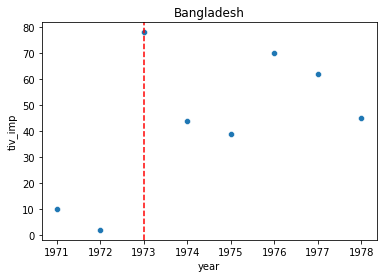

In [21]:
#exploration of the data
feat = 'tiv_imp'
rand_onset = onsets[np.random.randint(0,len(onsets),1)[0]]
print(bin_onset_effect(sambanis, rand_onset[1], rand_onset[0], feat, 5, threshold=0.1))
display_onset_effect(sambanis, rand_onset[1], rand_onset[0], feat, 5)

### Helper cell, used to generate some preliminary results on the proportions of onsets expericiencing a variation above a threshold

In [34]:
sambanis.columns

Index(['cowcode', 'year', 'warstds', 'ptime', 'autonomy', 'popdense', 'army85',
       'milper', 'trade', 'nmgdp', 'autch98', 'demch98', 'polch98', 'expgdp',
       'sxpnew', 'agexp', 'fuelexp', 'manuexp', 'p4mchg', 'fedpol3',
       'semipol3', 'centpol3', 'seceduc', 'pri', 'xconst', 'parreg', 'parcomp',
       'polcomp', 'partfree', 'major', 'presi', 'incumb', 'inst', 'lmtnest',
       'oil', 'anoc', 'dem', 'elfo2', 'warhist', 'sip2', 'gdpgrowth',
       'avgnabo', 'part', 'illiteracy', 'ehet', 'dlang', 'drel', 'infant',
       'life', 'elfo', 'etdo4590', 'auto4', 'dem4', 'pol4', 'pol4m', 'ncontig',
       'ef', 'plural', 'second', 'numlang', 'relfrac', 'plurrel', 'nwstate',
       'reg', 'ager', 'durable', 'exrec', 'inst3', 'ln_gdpen', 'lpopns',
       'coldwar', 'geo1', 'geo2', 'geo34', 'geo57', 'geo69', 'geo8',
       'regd4_alt', 'nmdp4_alt', 'nat_war', 'tnatwar', 'ef2', 'mirps0',
       'mirps1', 'mirps2', 'mirps3', 'sxpsq', 'pol4sq', 'decade1', 'decade2',
       'decade3', 'dec

In [43]:
threshold = 0.1
feat = 'milexp_gdp'
win = 3
incr = True

sum_var = np.array([bin_onset_effect(sambanis,
                                     ons[1],
                                     ons[0],
                                     feat,
                                     win,
                                     threshold,
                                     incr
                                    ) for ons in onsets])
pos_onsets = [ons for ons in onsets if bin_onset_effect(sambanis, ons[1], ons[0], feat, win, threshold, incr) == (1,1)]
print(sum_var[:,0].sum()/sum_var[:,1].sum())
print(sum_var[:,0].sum()) #positive finding
print(sum_var[:,1].sum()) #entries with available data

<ipython-input-17-d5c6e2d5cebf>:59: RuntimeWarning: invalid value encountered in double_scalars
  variation = (after_mean-before_mean)/before_mean
<ipython-input-17-d5c6e2d5cebf>:59: RuntimeWarning: invalid value encountered in double_scalars
  variation = (after_mean-before_mean)/before_mean


0.48148148148148145
26
54


<ipython-input-17-d5c6e2d5cebf>:59: RuntimeWarning: invalid value encountered in double_scalars
  variation = (after_mean-before_mean)/before_mean
<ipython-input-17-d5c6e2d5cebf>:59: RuntimeWarning: invalid value encountered in double_scalars
  variation = (after_mean-before_mean)/before_mean


### See the evolution of the proportions as a function of the threshold (carefull, this cell is slow)

In [23]:
incr_holder = []
for feat in feat_subset:
    dummy = [-1, -1, -1, -1, -1]
    for i, thr in enumerate([0.1, 0.5, 1, 2, 4]):
        tmp = np.array([bin_onset_effect(sambanis, ons[1], ons[0], feat, 3, thr, inc=True) for ons in onsets])
        dummy[i] = tmp[:,0].sum()/tmp[:,1].sum()
    incr_holder.append(dummy)
    
decr_holder = []
for feat in feat_subset:
    dummy = [-1, -1, -1, -1, -1]
    for i, thr in enumerate([0.1, 0.5, 1, 2, 4]):
        tmp = np.array([bin_onset_effect(sambanis, ons[1], ons[0], feat, 3, thr, inc=False) for ons in onsets])
        dummy[i] = tmp[:,0].sum()/tmp[:,1].sum()
    decr_holder.append(dummy)

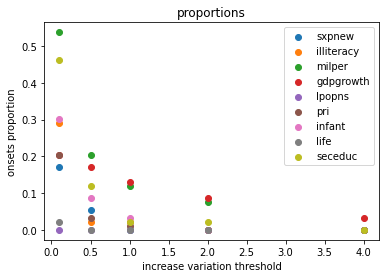

In [24]:
for i in range(len(feat_subset)):
    plt.scatter([0.1, 0.5, 1, 2, 4], incr_holder[i], label=feat_subset[i])
    plt.title("proportions")
plt.xlabel("increase variation threshold")
plt.ylabel("onsets proportion")
plt.legend()
plt.show()

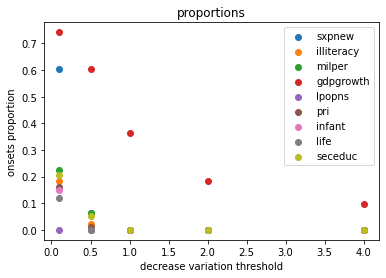

In [25]:
for i in range(len(feat_subset)):
    plt.scatter([0.1, 0.5, 1, 2, 4], decr_holder[i], label=feat_subset[i])
    plt.title("proportions")
plt.xlabel("decrease variation threshold")
plt.ylabel("onsets proportion")
plt.legend()
plt.show()

### compute the variation over a timeframe for all the countries with a neighbour experiencing a civil war onset

In [26]:
t_win = 3

df_tmp = pd.DataFrame()
df_pre = pd.DataFrame()
df_pos = pd.DataFrame()

for onset in onsets:
    pre, pos = comp_neighbour_feat(sambanis,
                                   onset[1],
                                   onset[0],
                                   t_win=t_win,
                                  )

    df_pre = pd.concat([df_pre,
                        pre
                       ]
                      )
    
    df_pos = pd.concat([df_pos,
                        pos
                       ]
                      )
    
df_tmp = (df_pos-df_pre)/df_pre
df_tmp.head(5)

/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: Runt

/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: Runt

/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: Runt

/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: Runt

/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: Runt

/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: Runt

/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: Runt

/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: Runt

/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: Runt

/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: Runt

/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: Runt

/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:201: Runt

/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)
/home/toinou/Documents/venvs/pyt3.8/lib/python3.8/site-packages/pandas/core/apply.py:284: Runt

,warstds,autonomy,popdense,army85,milper,trade,nmgdp,expgdp,sxpnew,agexp,...,mirps1,mirps2,mirps3,sxpsq,pol4sq,proxregc,tiv_imp,tiv_exp,milexp_gdp,milexp_spe
Afghanistan,NaN,-1.0,0.002219,0.002002,-0.002296,0.000416,-0.001538,0.000034,0.000335,-0.000530,...,-1.000000,0.523064,-1.0,-0.000226,0.238444,7.493235e-01,NaN,NaN,NaN,NaN
Afghanistan,NaN,-inf,0.002216,0.002003,-0.002303,0.000415,-0.001543,0.000034,0.000334,-0.000531,...,-inf,0.343429,-inf,-0.000226,0.192535,4.283505e-01,NaN,NaN,NaN,NaN
Afghanistan,NaN,-inf,0.015719,0.005514,-0.002885,0.001352,-0.004688,0.000148,0.000336,-0.000109,...,-inf,0.343429,-inf,-0.000227,0.231970,1.285051e+00,NaN,NaN,NaN,NaN
Afghanistan,NaN,-inf,0.011874,0.005514,-0.002377,0.001083,-0.002651,0.000085,0.000559,-0.000129,...,-0.084675,inf,-inf,-0.001318,0.392928,1.026727e+06,NaN,NaN,NaN,NaN
Afghanistan,0.0,-inf,0.010996,0.005514,-0.002447,0.000920,-0.003275,0.000078,0.000563,-0.000160,...,-0.127013,1.030286,-inf,-0.000713,0.397767,6.425257e-01,NaN,NaN,NaN,NaN


### Helper cell, used to generate some preliminary results on the proportions of onsets expericiencing a variation above a threshold (neighbours)

In [47]:
thr = 0.1
feat = 'seceduc'
print(len(df_tmp.loc[df_tmp[feat] > thr]))
print(len(df_tmp.loc[df_tmp[feat] < - thr]))
print(df_tmp[feat].isnull().sum())

##
print(len(df_tmp.loc[df_tmp[feat] > thr])/(len(df_tmp[feat])-df_tmp[feat].isnull().sum()))
print(len(df_tmp.loc[df_tmp[feat] < -thr])/(len(df_tmp[feat])-df_tmp[feat].isnull().sum()))

7827
6305
2066
0.4274012996232185
0.34429094086168294


In [28]:
#get countries with 8 or more onsets
countries_several_onsets_neight=get_n_plicate(df_tmp.reset_index(), 'index', 8)
countries_several_onsets_neight.rename(columns={'index':"country"}, inplace=True)

#get countries with at least 1 onset
countries_1_onsets_neight=get_n_plicate(df_tmp.reset_index(), 'index', 1)
countries_1_onsets_neight.rename(columns={'index':"country"}, inplace=True)

In [29]:
countries_several_onsets_neight["country"].drop_duplicates()[:5]

0      Afghanistan
520         Angola
600     Azerbaijan
660        Bolivia
688       Botswana
Name: country, dtype: object

## Studying the countries without onsets versus the others

In [30]:
#countries with at least 1 onset
countries_CW = list(sambanis.loc[sambanis["warstds"] == 1].country.drop_duplicates())
#countries without onset
countries_noCW = [c for c in sambanis.country.drop_duplicates() if c not in countries_CW]

### Helper function, help to vizualize trends

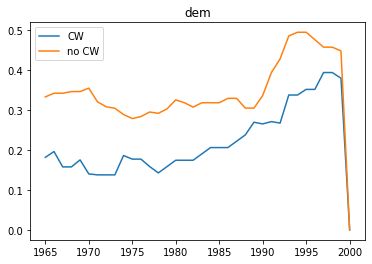

In [55]:
feat = 'dem'
no_CW = []
CW = []
year = [i for i in range(1965,2001)]

for i in year:
    CW.append(
    np.nanmean(sambanis.loc[(sambanis.year==i) & (sambanis["country"].isin(countries_CW))][feat]))
    no_CW.append(
    np.nanmean(sambanis.loc[(sambanis.year==i) & (sambanis["country"].isin(countries_noCW))][feat]))
    
plt.plot(year, CW, label="CW")
plt.plot(year, no_CW, label="no CW")
plt.title(feat)
plt.legend()
plt.show()

<ipython-input-64-cdd47ea468ef>:17: RuntimeWarning: Mean of empty slice
  np.nanmean(sambanis.loc[(sambanis.year==i) & (sambanis["geo1"]==1)][feat]))
<ipython-input-64-cdd47ea468ef>:19: RuntimeWarning: Mean of empty slice
  np.nanmean(sambanis.loc[(sambanis.year==i) & (sambanis["geo2"]==1)][feat]))
<ipython-input-64-cdd47ea468ef>:21: RuntimeWarning: Mean of empty slice
  np.nanmean(sambanis.loc[(sambanis.year==i) & (sambanis["geo34"]==1)][feat]))
<ipython-input-64-cdd47ea468ef>:23: RuntimeWarning: Mean of empty slice
  np.nanmean(sambanis.loc[(sambanis.year==i) & (sambanis["geo57"]==1)][feat]))
<ipython-input-64-cdd47ea468ef>:25: RuntimeWarning: Mean of empty slice
  np.nanmean(sambanis.loc[(sambanis.year==i) & (sambanis["geo69"]==1)][feat]))
<ipython-input-64-cdd47ea468ef>:27: RuntimeWarning: Mean of empty slice
  np.nanmean(sambanis.loc[(sambanis.year==i) & (sambanis["geo8"]==1)][feat]))


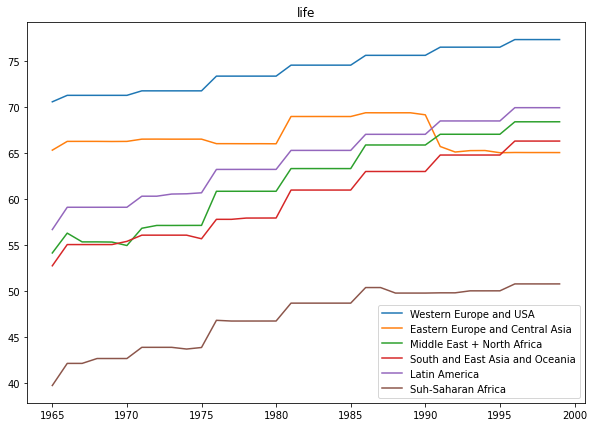

In [64]:
WS_US = []
EE_CA = []
ME_NA = []
SEA_O = []
LA = []
SSA = []

feat = 'life'
no_CW = []
CW = []
year = [i for i in range(1965,2001)]

fig = plt.figure(figsize=(10,7))

for i in year:
    WS_US.append(
    np.nanmean(sambanis.loc[(sambanis.year==i) & (sambanis["geo1"]==1)][feat]))
    EE_CA.append(
    np.nanmean(sambanis.loc[(sambanis.year==i) & (sambanis["geo2"]==1)][feat]))
    ME_NA.append(
    np.nanmean(sambanis.loc[(sambanis.year==i) & (sambanis["geo34"]==1)][feat]))
    SEA_O.append(
    np.nanmean(sambanis.loc[(sambanis.year==i) & (sambanis["geo57"]==1)][feat]))
    LA.append(
    np.nanmean(sambanis.loc[(sambanis.year==i) & (sambanis["geo69"]==1)][feat]))
    SSA.append(
    np.nanmean(sambanis.loc[(sambanis.year==i) & (sambanis["geo8"]==1)][feat]))

plt.plot(year, WS_US, label="Western Europe and USA")
plt.plot(year, EE_CA, label="Eastern Europe and Central Asia")
plt.plot(year, ME_NA, label="Middle East + North Africa")
plt.plot(year, SEA_O, label="South and East Asia and Oceania")
plt.plot(year, LA,    label="Latin America")
plt.plot(year, SSA,   label="Suh-Saharan Africa")

plt.title(feat)
plt.legend()
plt.show()

In [32]:
#onsets in countries with oil
#onsets = [(y[0],y[1]) for x, y in sambanis.loc[(sambanis["warstds"]==1) & (sambanis["oil"]==1)][["year","country"]].iterrows()]

### Helper function, compute the time before recovery for different features

In [ ]:
['cowcode', 'year', 'warstds', 'ptime', 'autonomy', 'popdense', 'army85',
       'milper', 'trade', 'nmgdp', 'autch98', 'demch98', 'polch98', 'expgdp',
       'sxpnew', 'agexp', 'fuelexp', 'manuexp', 'p4mchg', 'fedpol3',
       'semipol3', 'centpol3', 'seceduc', 'pri', 'xconst', 'parreg', 'parcomp',
       'polcomp', 'partfree', 'major', 'presi', 'incumb', 'inst', 'lmtnest',
       'oil', 'anoc', 'dem', 'elfo2', 'warhist', 'sip2', 'gdpgrowth',
       'avgnabo', 'part', 'illiteracy', 'ehet', 'dlang', 'drel', 'infant',
       'life', 'elfo', 'etdo4590', 'auto4', 'dem4', 'pol4', 'pol4m', 'ncontig',
       'ef', 'plural', 'second', 'numlang', 'relfrac', 'plurrel', 'nwstate',
       'reg', 'ager', 'durable', 'exrec', 'inst3', 'ln_gdpen', 'lpopns',
       'coldwar', 'geo1', 'geo2', 'geo34', 'geo57', 'geo69', 'geo8',
       'regd4_alt', 'nmdp4_alt', 'nat_war', 'tnatwar', 'ef2', 'mirps0',
       'mirps1', 'mirps2', 'mirps3', 'sxpsq', 'pol4sq', 'decade1', 'decade2',
       'decade3', 'decade4', 'proxregc', 'country', 'country_abb', 'tiv_imp',
       'tiv_exp', 'milexp_gdp', 'milexp_spe']

Croatia (1995)
Djibouti (1991)
Haiti (1991)
Kenya (1991)
* Laos (1960) 21 87.68445177
Papua New Guinea (1988)
Sierra Leone (1997)
Democratic Republic of the Congo (1991)
0.0


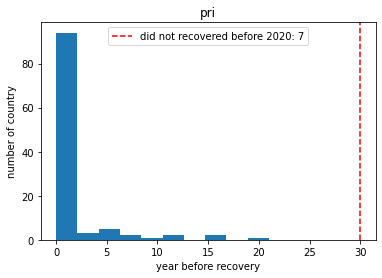

In [45]:
feat = 'pri'
j = 0
year_to_recov = []

for i in range(len(onsets)):
    val = max(sambanis.loc[
                    (sambanis.country==onsets[i][1]) & \
                    (sambanis.year>=int(onsets[i][0]-1)) & \
                    (sambanis.year<=int(onsets[i][0]+1))
                     ][feat]
             )

    next_date = list(sambanis.loc[(sambanis.country==onsets[i][1]) & \
                (sambanis.year>=onsets[i][0]) & \
                (sambanis[feat]>=val)
                ]['year'])
    if len(next_date)>0:
        next_date=int(next_date[0])
        year_to_recov.append(
        next_date-onsets[i][0])
        if next_date-onsets[i][0] > 20:
            print("*", onsets[i][1], "("+str(onsets[i][0])+")", next_date-onsets[i][0], val)

    else:
        print(onsets[i][1], "("+str(onsets[i][0])+")")
        j+=1
        
print(np.median(np.array(year_to_recov)))

#print the distribution of the recovery time
plt.hist(year_to_recov)
#plt.yscale('log')
plt.axvline(x=30, ymax=np.log(j)/np.log(2), c='r', 
            ls='--',
            label=f"did not recovered before 2020: {j}")
plt.title(feat)
plt.ylabel("number of country")
plt.xlabel("year before recovery")
plt.legend()
plt.show()

In [67]:
WE_US = sambanis.loc[(sambanis.warstds==1) & (sambanis["geo1"]==1)]
EE_CA = sambanis.loc[(sambanis.warstds==1) & (sambanis["geo2"]==1)]
ME_NA = sambanis.loc[(sambanis.warstds==1) & (sambanis["geo34"]==1)]
SEA_O = sambanis.loc[(sambanis.warstds==1) & (sambanis["geo57"]==1)]
LA = sambanis.loc[(sambanis.warstds==1) & (sambanis["geo69"]==1)]
SSA = sambanis.loc[(sambanis.warstds==1) & (sambanis["geo8"]==1)]

No handles with labels found to put in legend.


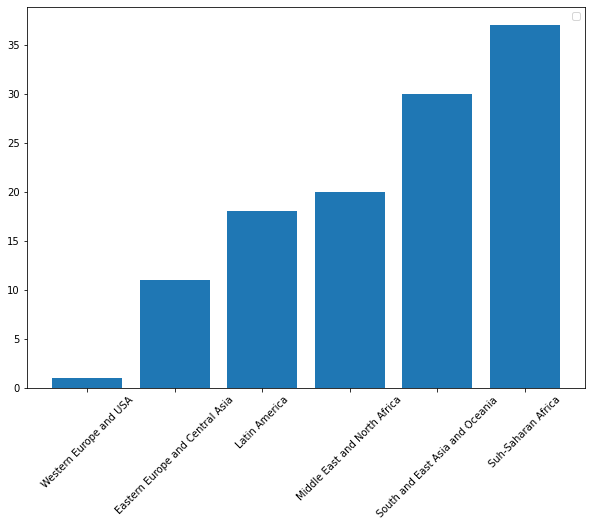

In [78]:
fig = plt.figure(figsize=(10,7))

x = ["Western Europe and USA",
"Eastern Europe and Central Asia",
"Latin America",
"Middle East and North Africa",
"South and East Asia and Oceania",
"Suh-Saharan Africa"]

h = [len(i) for i in [WE_US, EE_CA, LA, ME_NA, SEA_O, SSA]]
plt.bar(x, h)
plt.xticks(rotation=45)
plt.legend()
plt.show()

<BarContainer object of 6 artists>

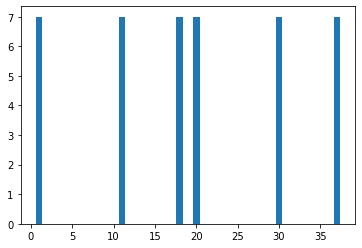

In [72]:
plt.bar(x, j)

In [ ]:
WE_US, EE_CA, ME_NA, SEA_O, LA, SSA